<a href="https://colab.research.google.com/github/HowonRyu/ConfidenceSet/blob/main/ConfidenceSet_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize
import random
import sys
import os
import math
import scipy.stats
from tabulate import tabulate

#!rm -rf ConfSets
#!git clone https://github.com/TomMaullin/ConfSets.git
#sys.path.append('/content/ConfSets/lib/')
#from generateData import *
#from boundary import *

!pip install git+https://github.com/HowonRyu/ConfidenceSet.git
from confidenceset.random_field_generator import *
from confidenceset.confset import *
from confidenceset.plot import *
from confidenceset.test import *

%load_ext autoreload
%autoreload 2

  Cloning https://github.com/HowonRyu/ConfidenceSet.git to /tmp/pip-req-build-j0ws2owx
  Running command git clone --filter=blob:none --quiet https://github.com/HowonRyu/ConfidenceSet.git /tmp/pip-req-build-j0ws2owx
  Resolved https://github.com/HowonRyu/ConfidenceSet.git to commit 84993d3093f6e637bcf16c708becdde6f4eabae9
  Preparing metadata (setup.py) ... done
  Created wheel for confidenceset: filename=confidenceset-0.0.2-py3-none-any.whl size=12858 sha256=81f26a7ec536193d25e869dbc7d4fc507c0e0e767c70f1281bab79b6b787be6c
  Stored in directory: /tmp/pip-ephem-wheel-cache-qlj59s9t/wheels/ff/40/a3/2e98c05b8a9865e6f9e38fc1befbf42781f18284891f14ff25
Successfully built confidenceset


Defining specs for the shape

In [ ]:
dim_100 = (80,100,100)
dim_50 = (80, 50, 50)


spec_50, spec_100 = gen_spec(fwhm_sig=10, fwhm_noise=0, std=5, mag=4, r=0.5)
spec_50_sig20, spec_100_sig20 = gen_spec(fwhm_sig=20, fwhm_noise=0, std=5, mag=4, r=0.5)
spec_50_noise10, spec_100_noise10 = gen_spec(fwhm_sig=10, fwhm_noise=10, std=5, mag=4, r=0.5)
spec_50_noise20, spec_100_noise20 = gen_spec(fwhm_sig=10, fwhm_noise=20, std=5, mag=4, r=0.5)

# for plot functions
shape_specs_50 = [spec_50, spec_50_sig20, spec_50_noise10, spec_50_noise20]
shape_specs_100 = [spec_100, spec_100_sig20, spec_100_noise10, spec_100_noise20]
shape_specs_sim = [shape_specs_50, shape_specs_100]

# for signal plotting
spec_cir_50, spec_elp_50, spec_ramp_50 = spec_50
spec_cir_100, spec_elp_100, spec_ramp_100 = spec_100

spec_cir_50_smth, spec_elp_50_smth, spec_ramp_50_smth = spec_50_noise10
spec_cir_100_smth, spec_elp_100_smth, spec_ramp_100_smth = spec_100_noise10

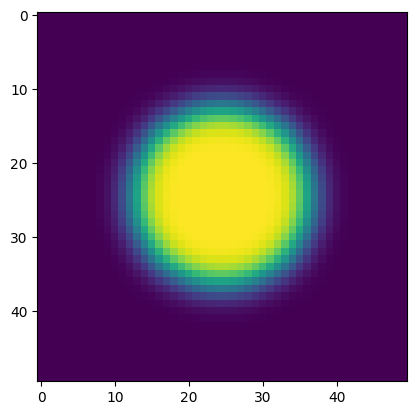

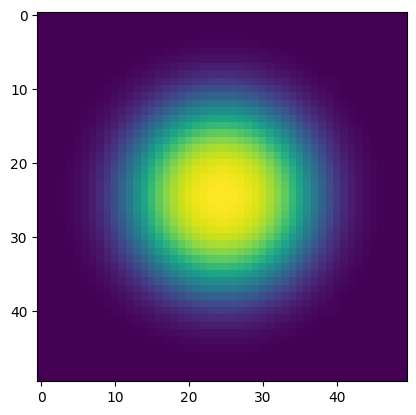

In [ ]:
test0, mu_test0 = gen_2D(dim_50, shape="ellipse", shape_spec=spec_50[0])
test1, mu_test1 = gen_2D(dim_50, shape="ellipse", shape_spec=spec_50_sig20[0])

plt.imshow(mu_test0)
plt.show()
plt.imshow(mu_test1)
plt.show()

# FDR Confidence Set



\begin{array}{|c|c|} \hline
 & N & P &  \\ \hline
H_0 & TN & FP & m_0 \\
H_1 & FN & TP & m-m_0 \\ \hline
 & m-R & R & m \\ \hline
\end{array}


**Family Wise Error Rate (FWER)**
*   $FWER = P(FP \ge 1 | H_0)$
*   In multiple testing, use Bonferroni to control for: $FWER <\frac{\alpha}{m}$



**False Discovery Rate (FDR)**

*   $FDR = E(\frac{FP}{R} | R>0)P(R>0) = E \frac{FP}{\max(1,R)} $
*  ((If you can add BH proof))

## Signals

Different settings of image size and variance

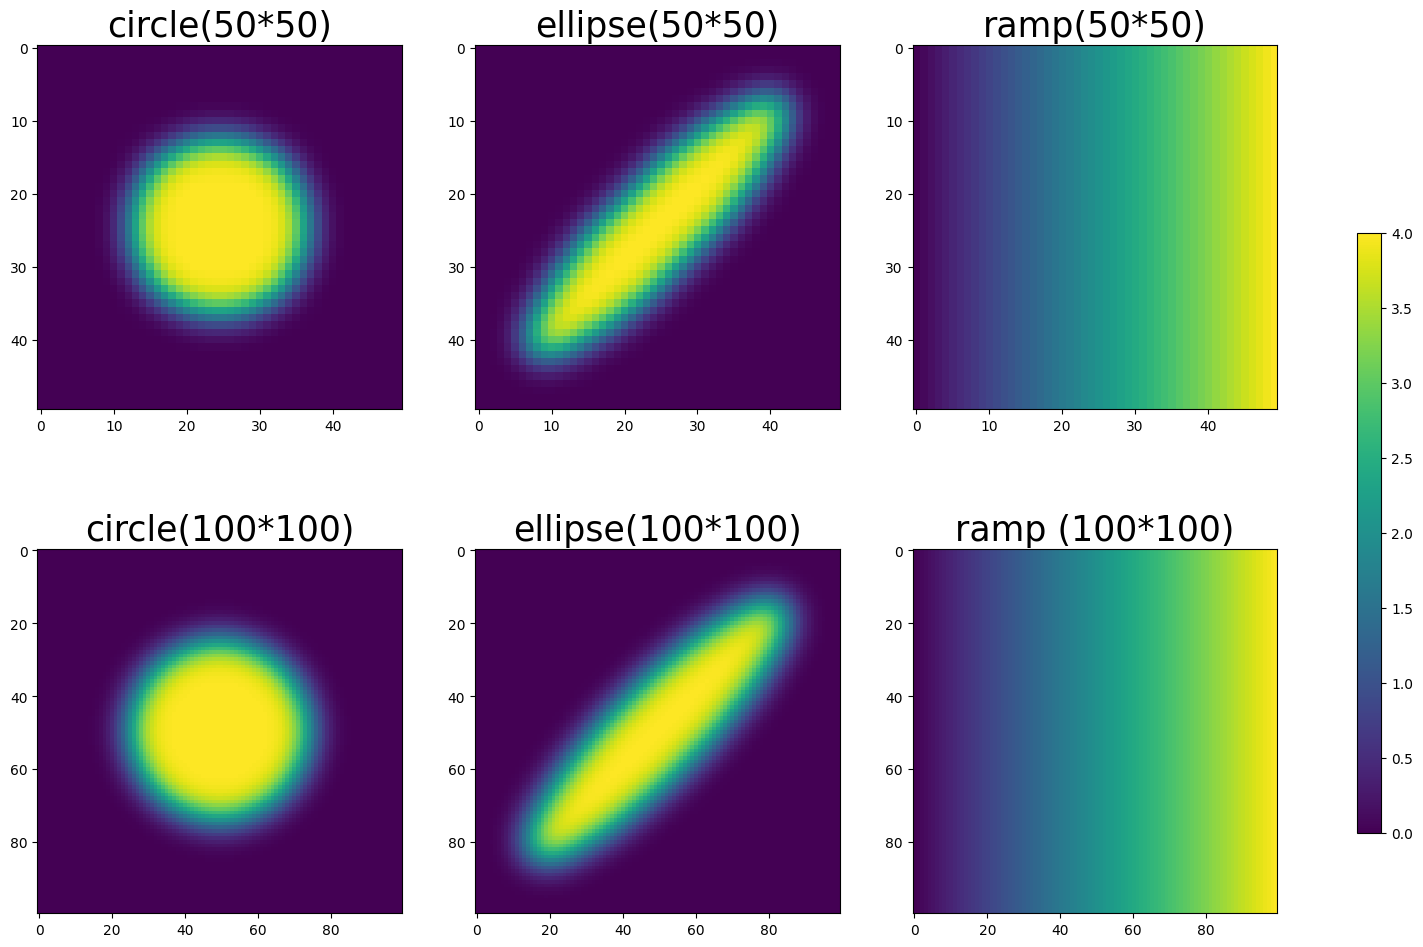

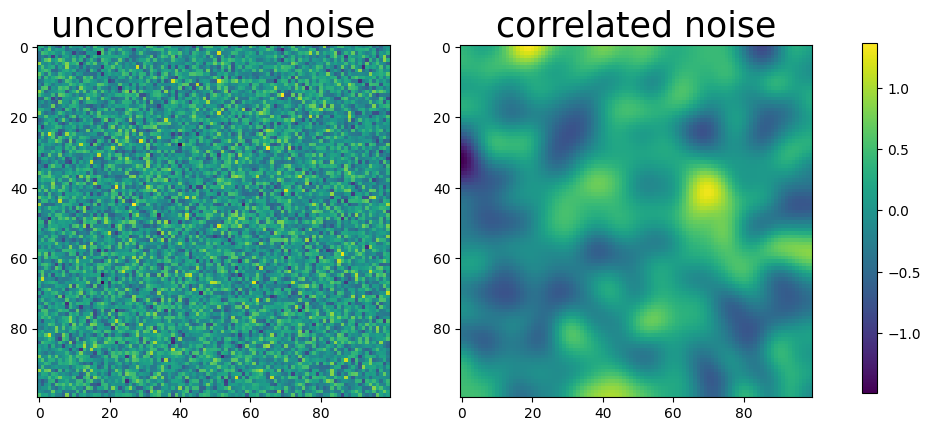

In [ ]:
#random field generator

circular_50, mu_circular_50 = gen_2D(dim_50, shape="ellipse", shape_spec=spec_cir_50)
ellipse_50, mu_ellipse_50 = gen_2D(dim_50, shape="ellipse", shape_spec=spec_elp_50)
ramp_50, mu_ramp_50 = gen_2D(dim_50, shape="ramp", shape_spec=spec_ramp_50)
circular_100, mu_circular_100 = gen_2D(dim_100, shape="ellipse", shape_spec=spec_cir_100)
ellipse_100, mu_ellipse_100 = gen_2D(dim_100, shape="ellipse", shape_spec=spec_elp_100)
ramp_100, mu_ramp_100 = gen_2D(dim_100, shape="ramp", shape_spec=spec_ramp_100)


circular_50_smth, _ = gen_2D(dim_50, shape="ellipse", shape_spec=spec_cir_50_smth)
ellipse_50_smth, _ = gen_2D(dim_50, shape="ellipse", shape_spec=spec_elp_50_smth)
ramp_50_smth, _ = gen_2D(dim_50, shape="ramp", shape_spec=spec_ramp_50_smth)
circular_100_smth, _ = gen_2D(dim_100, shape="ellipse", shape_spec=spec_cir_100_smth)
ellipse_100_smth, _ = gen_2D(dim_100, shape="ellipse", shape_spec=spec_elp_100_smth)
ramp_100_smth, _ = gen_2D(dim_100, shape="ramp", shape_spec=spec_ramp_100_smth)



#plotting
fig, axs = plt.subplots(2, 3, figsize=(16, 12))
im = axs[0,0].imshow(mu_circular_50)
axs[0,0].set_title("circle(50*50)", fontsize = 25)
#plt.colorbar(im00, ax=axs[0, 0])

im = axs[0,1].imshow(mu_ellipse_50)
axs[0,1].set_title("ellipse(50*50)", fontsize = 25)
#plt.colorbar(im01, ax=axs[0, 1])

im = axs[0,2].imshow(mu_ramp_50)
axs[0,2].set_title("ramp(50*50)", fontsize = 25)
#plt.colorbar(im02, ax=axs[0, 2])


im = axs[1,0].imshow(mu_circular_100)
axs[1,0].set_title("circle(100*100)", fontsize = 25)
#plt.colorbar(im00, ax=axs[0, 0])

im = axs[1,1].imshow(mu_ellipse_100)
axs[1,1].set_title("ellipse(100*100)", fontsize = 25)
#plt.colorbar(im01, ax=axs[0, 1])

im = axs[1,2].imshow(mu_ramp_100)
axs[1,2].set_title("ramp (100*100)", fontsize = 25)
#plt.colorbar(im01, ax=axs[0, 1])


cbar_ax = fig.add_axes([0.95, 0.2, 0.015, 0.5])
fig.colorbar(im, cax=cbar_ax)
plt.show()




fig, axs = plt.subplots(1, 2, figsize=(10, 7))
im = axs[0].imshow(circular_100[0,:,:]-mu_circular_100)
axs[0].set_title("uncorrelated noise", fontsize = 25)
#plt.colorbar(im00, ax=axs[0, 0])

im = axs[1].imshow(circular_100_smth[0,:,:]-mu_circular_100)
axs[1].set_title("correlated noise", fontsize = 25)
#plt.colorbar(im01, ax=axs[0, 1])


cbar_ax = fig.add_axes([0.95, 0.25, 0.015, 0.5])
fig.colorbar(im, cax=cbar_ax)
plt.show()

## Confidence Set Construction
See how one-sided and two-sided tests and sub-setting for inner and outer confidence sets are constructd

### new attempt- option 1 & 2

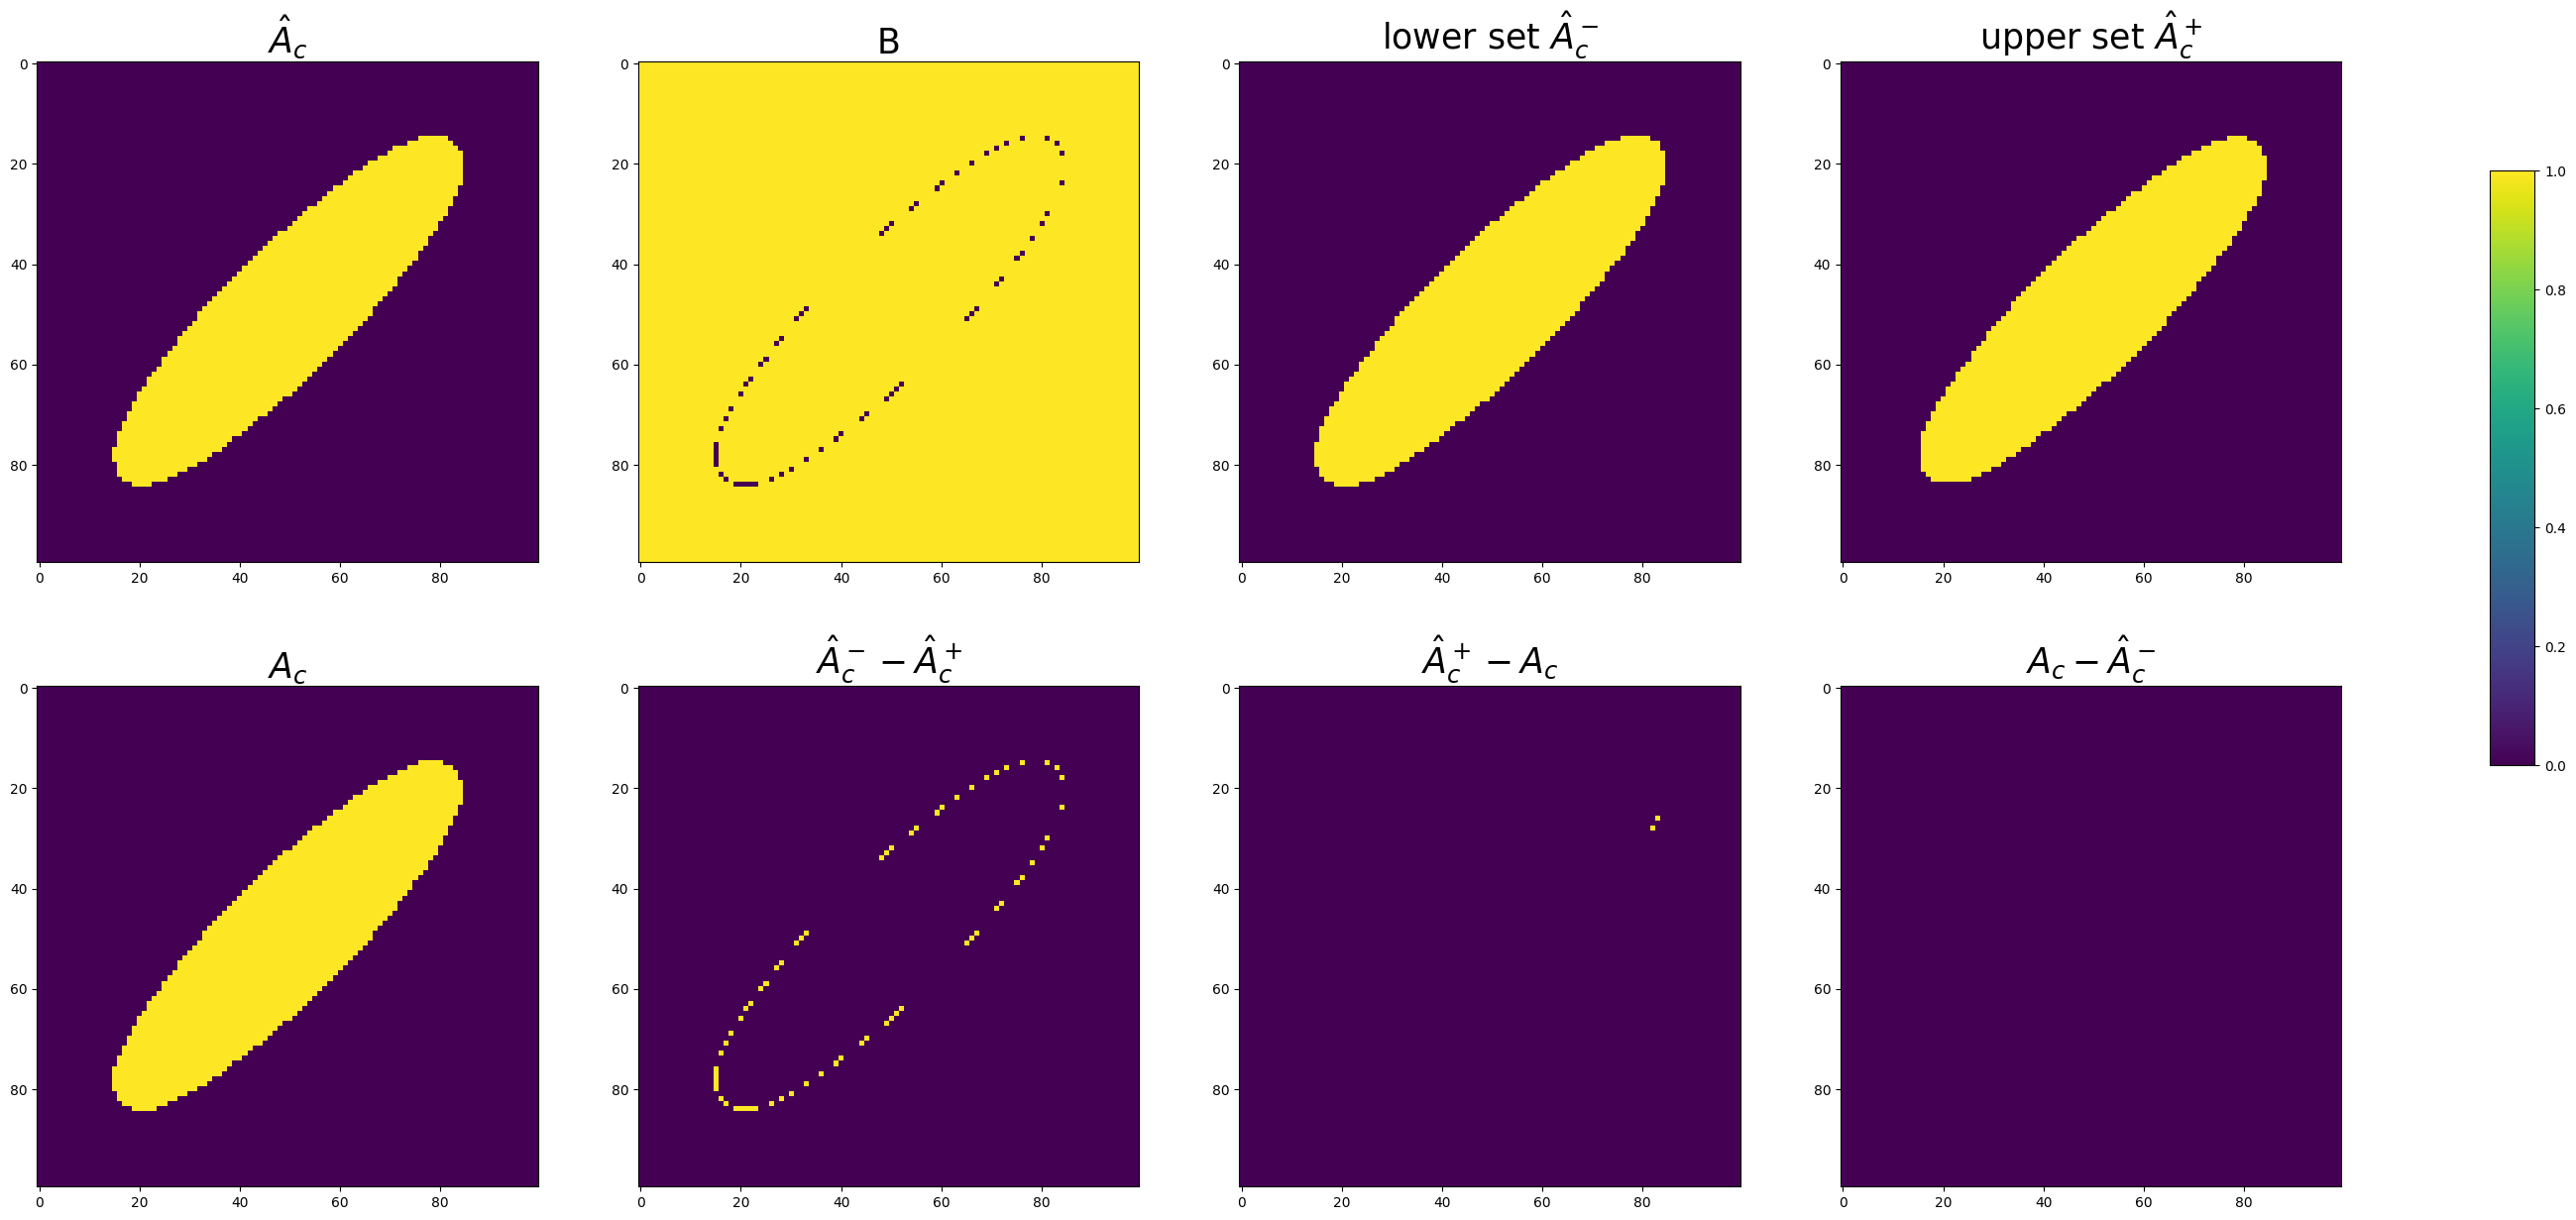

In [ ]:
#option 1

threshold = 2
alpha = 0.05


data = ellipse_100_smth
mu = mu_ellipse_100
Ac = mu >= threshold


data_tstat = mvtstat(data - threshold)
data_dim = data.shape
nsubj = data_dim[0]
Achat = data_tstat >= 0
Achat_C = data_tstat < 0



inner_pvals = 1 - scipy.stats.t.cdf(data_tstat, df=nsubj - 1)
outer_pvals = scipy.stats.t.cdf(data_tstat, df=nsubj - 1)
min_pvals = np.minimum(inner_pvals, outer_pvals)

rejection_ind, _, n_rej = fdr_BH(min_pvals, alpha)

outer_set = 1 - Achat_C * rejection_ind
inner_set = Achat * rejection_ind

outsubinn = np.maximum(outer_set - inner_set, 0)
FN_upp = np.maximum(inner_set - Ac, 0)
FN_low = np.maximum(Ac-outer_set, 0)


fig, axs = plt.subplots(2, 4, figsize=(30, 15))

_min, _max = 0,1

im = axs[0,0].imshow(Achat, vmin = _min, vmax = _max)
axs[0,0].set_title("$\hat{A}_c$", fontsize = 25)
im = axs[0,1].imshow(rejection_ind, vmin = _min, vmax = _max)
axs[0,1].set_title("B", fontsize = 25)
im = axs[0,2].imshow(outer_set, vmin = _min, vmax = _max)
axs[0,2].set_title("lower set $\hat{A}_c^-$", fontsize = 25)
im = axs[0,3].imshow(inner_set, vmin = _min, vmax = _max)
axs[0,3].set_title("upper set $\hat{A}_c^+$", fontsize = 25)
im = axs[1,0].imshow(Ac, vmin = _min, vmax = _max)
axs[1,0].set_title("$A_c$", fontsize = 25)
im = axs[1,1].imshow(outsubinn)
axs[1,1].set_title("$\hat{A}_c^- - \hat{A}_c^+$", fontsize = 25)

im = axs[1,2].imshow(FN_upp, vmin = _min, vmax = _max)
axs[1,2].set_title("$\hat{A}_c^+ - A_c$", fontsize = 25)
im = axs[1,3].imshow(FN_low, vmin = _min, vmax = _max)
axs[1,3].set_title("$A_c - \hat{A}_c^- $", fontsize = 25)



cbar_ax = fig.add_axes([0.95, 0.4, 0.015, 0.4])
fig.colorbar(im, cax=cbar_ax, cmap='RdPu')
plt.show()


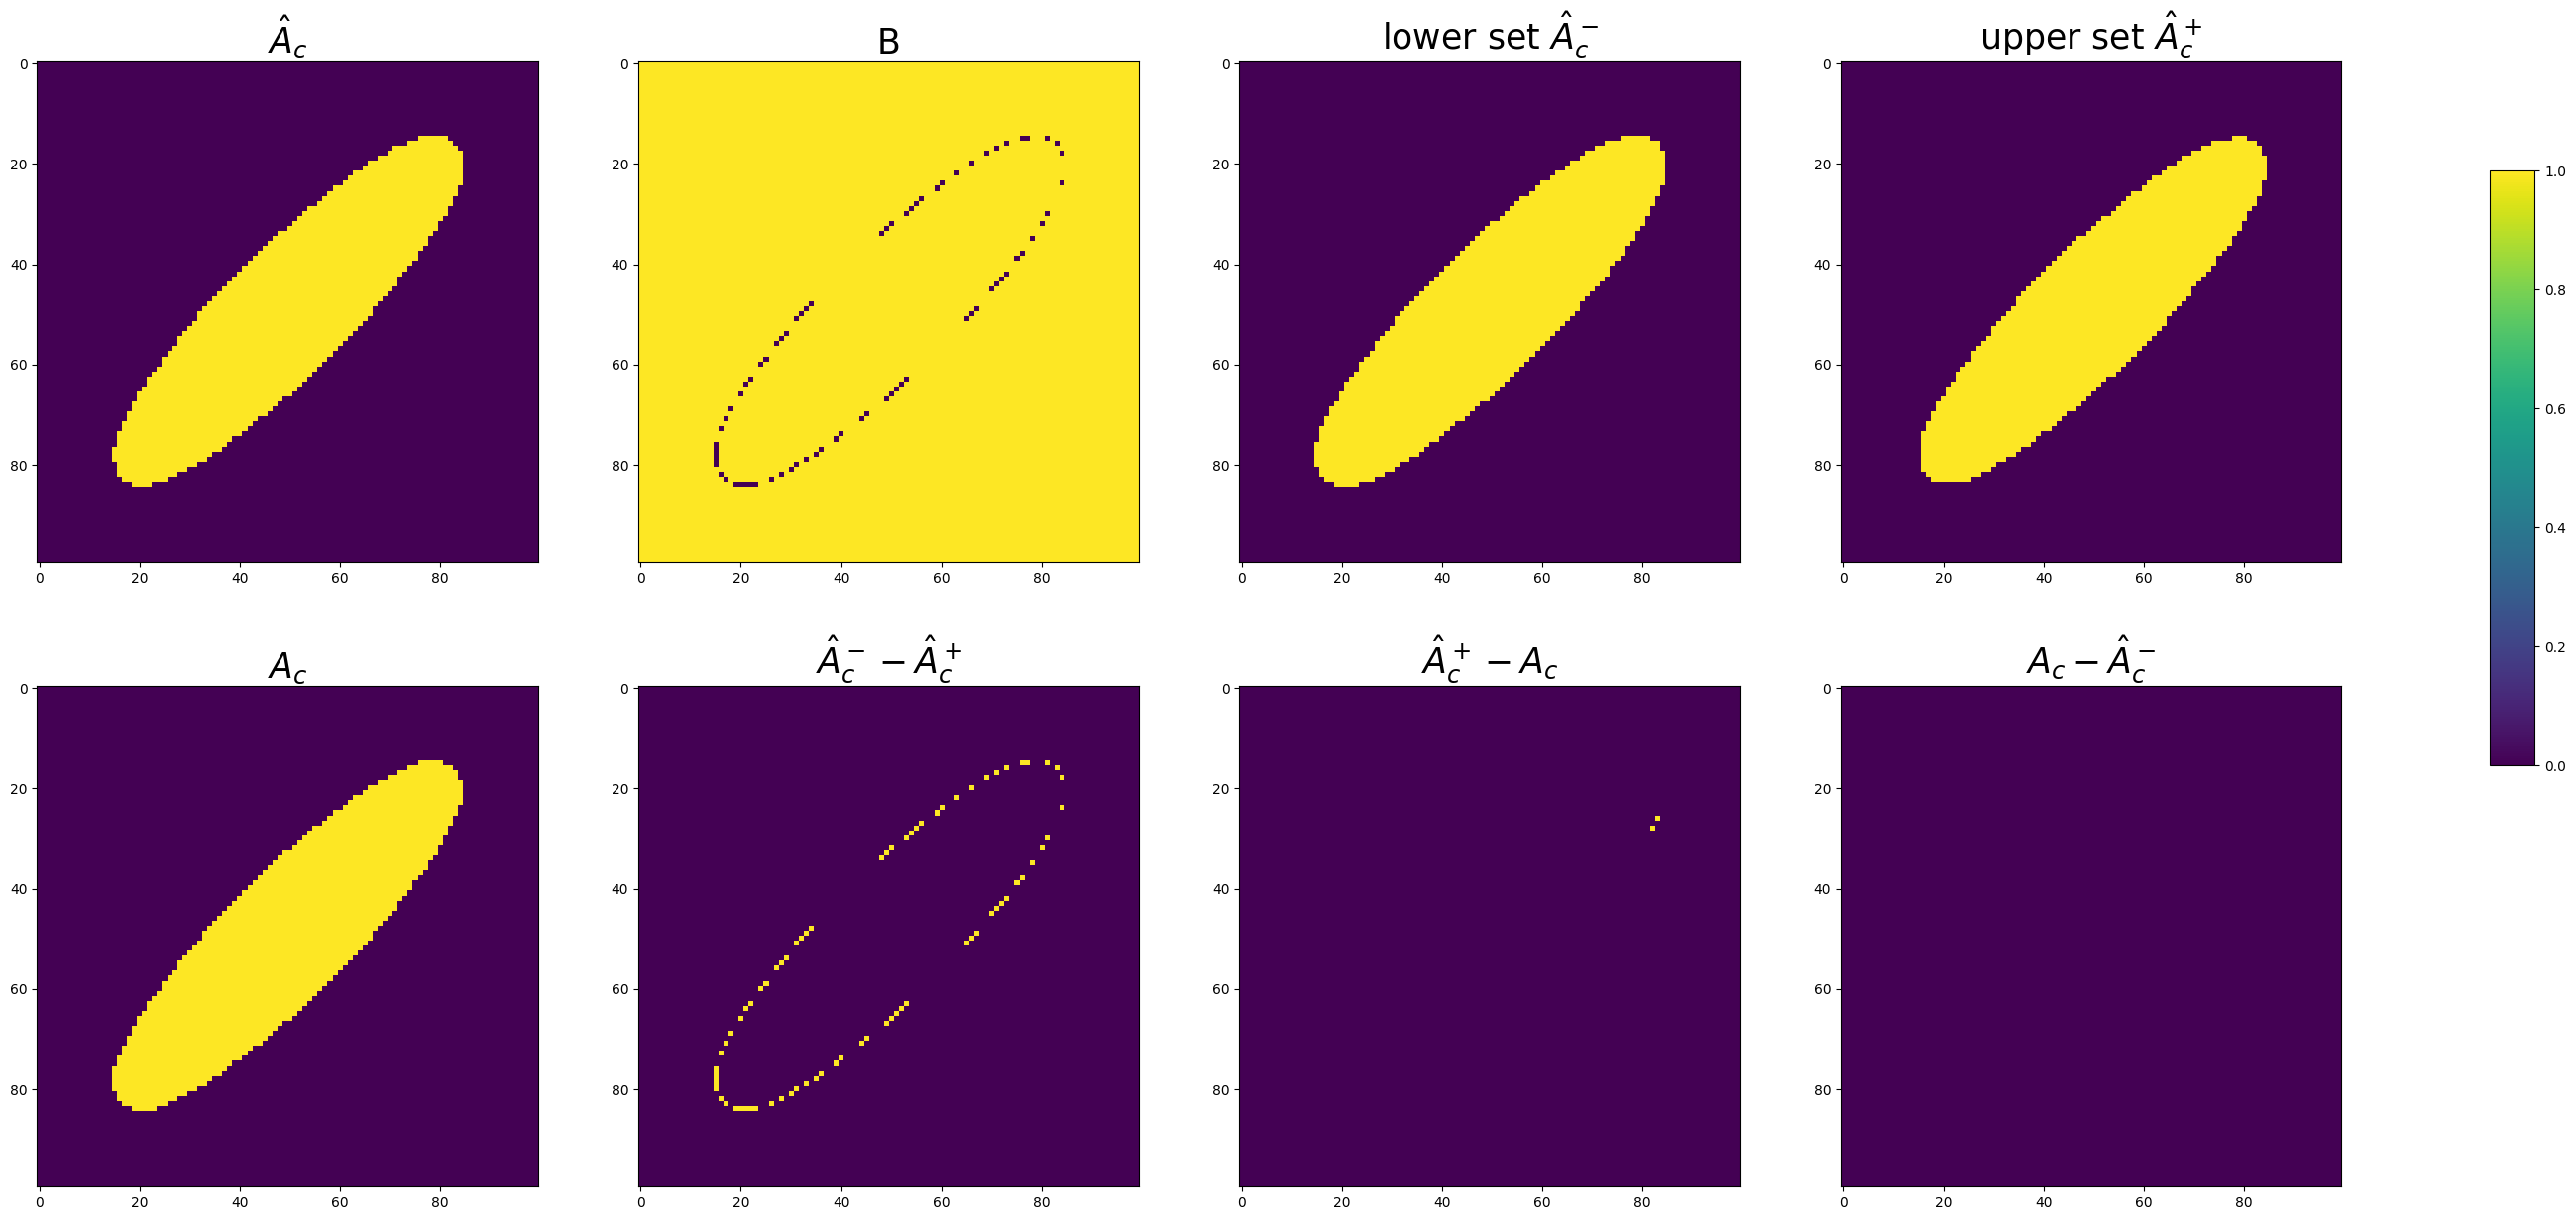

In [ ]:
#option 2
threshold = 2
alpha = 0.025


data = ellipse_100_smth
mu = mu_ellipse_100
Ac = mu >= threshold


data_tstat = mvtstat(data - threshold)
data_dim = data.shape
nsubj = data_dim[0]
Achat = data_tstat >= 0
Achat_C = data_tstat < 0
inner_pvals = 1 - scipy.stats.t.cdf(data_tstat, df=nsubj - 1)
outer_pvals = scipy.stats.t.cdf(data_tstat, df=nsubj - 1)
min_pvals = np.minimum(inner_pvals, outer_pvals)

rejection_ind, _, n_rej = fdr_BH(min_pvals, alpha)

outer_set = 1 - Achat_C * rejection_ind
inner_set = Achat * rejection_ind

outsubinn = np.maximum(outer_set - inner_set, 0)
FN_upp = np.maximum(inner_set - Ac, 0)
FN_low = np.maximum(Ac-outer_set, 0)


fig, axs = plt.subplots(2, 4, figsize=(30, 15))

_min, _max = 0,1

im = axs[0,0].imshow(Achat, vmin = _min, vmax = _max)
axs[0,0].set_title("$\hat{A}_c$", fontsize = 25)
im = axs[0,1].imshow(rejection_ind, vmin = _min, vmax = _max)
axs[0,1].set_title("B", fontsize = 25)
im = axs[0,2].imshow(outer_set, vmin = _min, vmax = _max)
axs[0,2].set_title("lower set $\hat{A}_c^-$", fontsize = 25)
im = axs[0,3].imshow(inner_set, vmin = _min, vmax = _max)
axs[0,3].set_title("upper set $\hat{A}_c^+$", fontsize = 25)
im = axs[1,0].imshow(Ac, vmin = _min, vmax = _max)
axs[1,0].set_title("$A_c$", fontsize = 25)
im = axs[1,1].imshow(outsubinn)
axs[1,1].set_title("$\hat{A}_c^- - \hat{A}_c^+$", fontsize = 25)

im = axs[1,2].imshow(FN_upp, vmin = _min, vmax = _max)
axs[1,2].set_title("$\hat{A}_c^+ - A_c$", fontsize = 25)
im = axs[1,3].imshow(FN_low, vmin = _min, vmax = _max)
axs[1,3].set_title("$A_c - \hat{A}_c^- $", fontsize = 25)



cbar_ax = fig.add_axes([0.95, 0.4, 0.015, 0.4])
fig.colorbar(im, cax=cbar_ax, cmap='RdPu')
plt.show()






## Confidence Sets
Now we look at $\hat{A}_c^+ + \hat{A}_c^-$ + $A_c$

### new attempt - option 1&2

In [ ]:
def conf_plot_agg_temp(threshold, temp, method, r=0.5, std = 5, fwhm_noise=3, fwhm_signal=20, mag = 3, fontsize = 25, figsize=(30, 20), alpha=0.05):

  """
  plots FDR controlling confidence sets for six different random fields

  Parameters
  ----------
  threshold : int
      threshold c
  temp : str
      options for creating confidence set "0", "1" or "2"
  method : str
      "BH" or "adaptive"
  r : int
      radii of ellipses
  std : int
      standard deviation for the noise field N(0, std^2)
  mag : int
      magnitude of the signal
  fontsize : int
  f   ont size for figure
  figsize : tuple
      figure size
  alpha : int
  [0, 1] alpha level

  Examples
  --------
  conf_plot_agg_temp(threshold=2, temp = "1", std=7, method="BH", _min=0, _max=3, fontsize=10, alpha=0.05, figsize = (5,3))

  :Authors:
    Howon Ryu <howonryu@ucsd.edu>
  """
  if temp == "1":
    fdr_cope_function = fdr_cope_temp1
  elif temp == "2":
    fdr_cope_function = fdr_cope_temp2
  elif temp == "0":
    fdr_cope_function = fdr_cope

  cmap1 = colors.ListedColormap(['black', 'blue'])
  cmap2 = colors.ListedColormap(['none', 'yellow'])
  cmap22 = colors.ListedColormap(['black', 'yellow'])
  cmap3 = colors.ListedColormap(['none', 'red'])
  dim_100 = (80,100,100)


  spec_cir_100_smth = {'a':r, 'b':r, 'std':std, 'mag':mag, 'fwhm_noise':fwhm_noise, 'fwhm_signal':fwhm_signal}
  spec_elp_100_smth = {'a':r*2, 'b':r*0.5, 'std':std,'mag':mag, 'fwhm_noise':fwhm_noise, 'fwhm_signal':fwhm_signal}
  spec_ramp_100_smth = {'direction':1, 'std':std, 'mag':(0,mag), 'fwhm_noise':fwhm_noise}

  circular_100_smth, _ = gen_2D(dim_100, shape="ellipse", shape_spec=spec_cir_100_smth)
  ellipse_100_smth, _ = gen_2D(dim_100, shape="ellipse", shape_spec=spec_elp_100_smth)
  ramp_100_smth, _ = gen_2D(dim_100, shape="ramp", shape_spec=spec_ramp_100_smth)


  cmap = colors.ListedColormap(['black', 'blue', 'yellow', 'red'])
  fig, axs = plt.subplots(1,3, figsize=figsize)

  im = axs[0].imshow(fdr_cope_function(data=circular_100_smth, method=method, tail="two",  alpha=alpha,  threshold=threshold)[0], cmap=cmap1)
  im = axs[0].imshow(fdr_cope_function(data=circular_100_smth, method=method, tail="two", alpha=alpha,threshold=threshold)[2], cmap=cmap2)
  im = axs[0].imshow(fdr_cope_function(data=circular_100_smth, method=method, tail="two", alpha=alpha,threshold=threshold)[1], cmap=cmap3)
  axs[0].set_title("circle", fontsize = fontsize)

  im = axs[1].imshow(fdr_cope_function(data=ellipse_100_smth, method=method, tail="two", alpha=alpha, threshold=threshold)[0], cmap=cmap1)
  im = axs[1].imshow(fdr_cope_function(data=ellipse_100_smth, method=method, tail="two", alpha=alpha,threshold=threshold)[2], cmap=cmap2)
  im = axs[1].imshow(fdr_cope_function(data=ellipse_100_smth, method=method, tail="two", alpha=alpha,threshold=threshold)[1], cmap=cmap3)
  axs[1].set_title("ellipse", fontsize = fontsize)

  im = axs[2].imshow(fdr_cope_function(data=ramp_100_smth, tail="two", method=method, alpha=alpha, threshold=threshold)[0], cmap=cmap1)
  im = axs[2].imshow(fdr_cope_function(data=ramp_100_smth, method=method, tail="two", alpha=alpha, threshold=threshold)[2], cmap=cmap2)
  im = axs[2].imshow(fdr_cope_function(data=ramp_100_smth, method=method, tail="two", alpha=alpha, threshold=threshold)[1], cmap=cmap3)
  axs[2].set_title("ramp", fontsize = fontsize)

  # im = axs[1, 0].imshow(fdr_cope_function(data=circular_100_smth, method=method, alpha=alpha,  threshold=threshold)[0], cmap=cmap1)
  # im = axs[1, 0].imshow(fdr_cope_function(data=circular_100_smth, method=method, alpha=alpha, threshold=threshold)[2], cmap=cmap2)
  # im = axs[1, 0].imshow(fdr_cope_function(data=circular_100_smth, method=method, alpha=alpha, threshold=threshold)[1], cmap=cmap3)
  # axs[1, 0].set_title("circle(smoothed)", fontsize = fontsize)


  # im = axs[1, 1].imshow(fdr_cope_function(data=ellipse_100_smth, method=method, alpha=alpha, threshold=threshold)[0], cmap=cmap1)
  # im = axs[1, 1].imshow(fdr_cope_function(data=ellipse_100_smth, method=method, alpha=alpha, threshold=threshold)[2], cmap=cmap2)
  # im = axs[1, 1].imshow(fdr_cope_function(data=ellipse_100_smth, method=method, alpha=alpha, threshold=threshold)[1], cmap=cmap3)
  # axs[1, 1].set_title("ellipse(smoothed)", fontsize = fontsize)

  # im = axs[1, 2].imshow(fdr_cope_function(data=ramp_100_smth, method=method, alpha=alpha, threshold=threshold)[0], cmap=cmap1)
  # im = axs[1, 2].imshow(fdr_cope_function(data=ramp_100_smth, method=method, alpha=alpha, threshold=threshold)[2], cmap=cmap2)
  # im = axs[1, 2].imshow(fdr_cope_function(data=ramp_100_smth, method=method, alpha=alpha, threshold=threshold)[1], cmap=cmap3)
  # axs[1, 2].set_title("ramp(smoothed)", fontsize = fontsize)

  plt.suptitle(f"method={method}, confset method={temp}, alpha={alpha}")
  plt.show()

#### BH

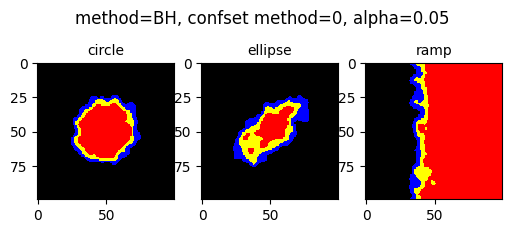

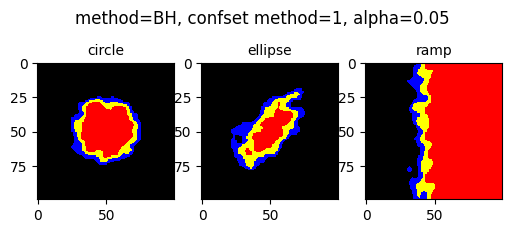

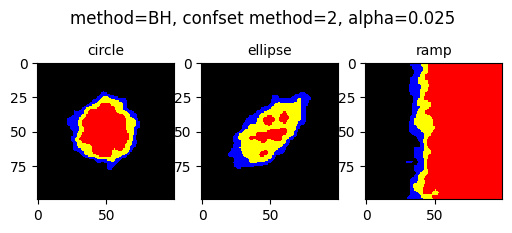

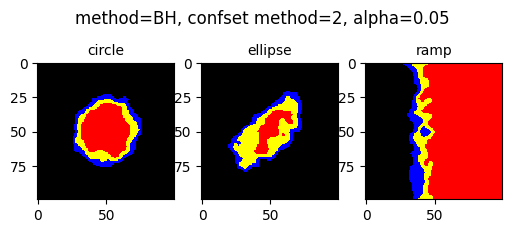

In [ ]:
fn = 6
fs = 40
figsize = (6,2.5)
mag=5
std = 10
conf_plot_agg_temp(threshold=2, temp = "0", std=std, mag=mag, fwhm_noise=fn, fwhm_signal=fs, method="BH", fontsize=10, alpha=0.05, figsize = figsize)
conf_plot_agg_temp(threshold=2, temp = "1", std=std, mag=mag,fwhm_noise=fn, fwhm_signal=fs,method="BH",  fontsize=10, alpha=0.05, figsize = figsize)
conf_plot_agg_temp(threshold=2, temp = "2", std=std, mag=mag,fwhm_noise=fn, fwhm_signal=fs,method="BH",  fontsize=10, alpha=0.05/2, figsize = figsize)
conf_plot_agg_temp(threshold=2, temp = "2", std=std, mag=mag, fwhm_noise=fn, fwhm_signal=fs,method="BH",  fontsize=10, alpha=0.05, figsize = figsize)

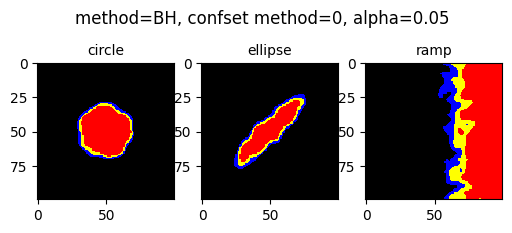

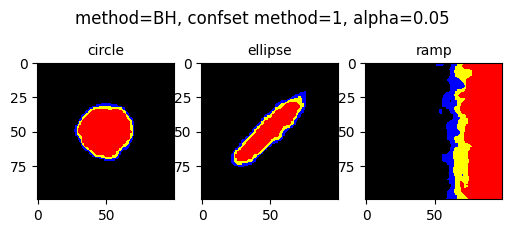

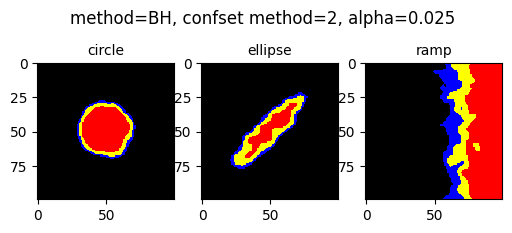

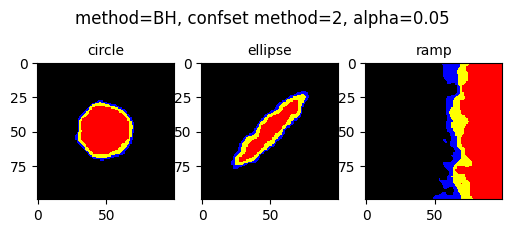

In [ ]:
fn = 6
fs = 20
mag=3
figsize = (6,2.5)
conf_plot_agg_temp(threshold=2, temp = "0", std=7, mag=mag, fwhm_noise=fn, fwhm_signal=fs, method="BH", fontsize=10, alpha=0.05, figsize = figsize)
conf_plot_agg_temp(threshold=2, temp = "1", std=7, mag=mag,fwhm_noise=fn, fwhm_signal=fs,method="BH",  fontsize=10, alpha=0.05, figsize = figsize)
conf_plot_agg_temp(threshold=2, temp = "2", std=7, mag=mag,fwhm_noise=fn, fwhm_signal=fs,method="BH",  fontsize=10, alpha=0.05/2, figsize = figsize)
conf_plot_agg_temp(threshold=2, temp = "2", std=7, mag=mag, fwhm_noise=fn, fwhm_signal=fs,method="BH",  fontsize=10, alpha=0.05, figsize = figsize)

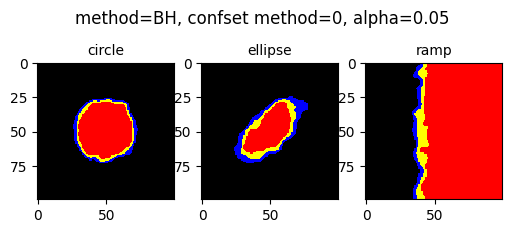

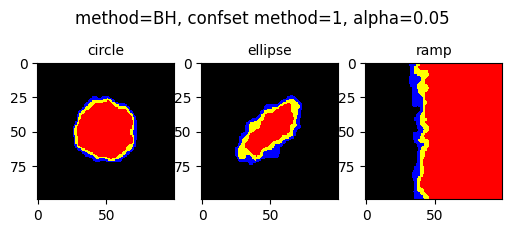

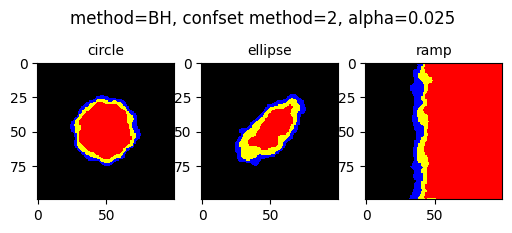

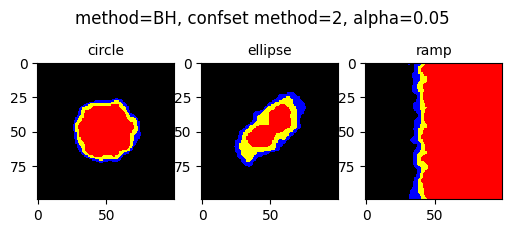

In [ ]:
fn = 6
fs = 40
figsize = (6,2.5)
conf_plot_agg_temp(threshold=2, temp = "0", std=7, mag=mag, fwhm_noise=fn, fwhm_signal=fs, method="BH", fontsize=10, alpha=0.05, figsize = figsize)
conf_plot_agg_temp(threshold=2, temp = "1", std=7, mag=mag,fwhm_noise=fn, fwhm_signal=fs,method="BH",  fontsize=10, alpha=0.05, figsize = figsize)
conf_plot_agg_temp(threshold=2, temp = "2", std=7, mag=mag,fwhm_noise=fn, fwhm_signal=fs,method="BH",  fontsize=10, alpha=0.05/2, figsize = figsize)
conf_plot_agg_temp(threshold=2, temp = "2", std=7, mag=mag, fwhm_noise=fn, fwhm_signal=fs,method="BH",  fontsize=10, alpha=0.05, figsize = figsize)

#### Adaptive

*   Used k=2, $\alpha_0 = 0.05/4$, $\alpha_1 = 0.05/2$

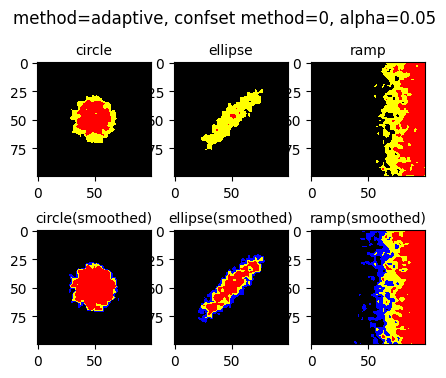

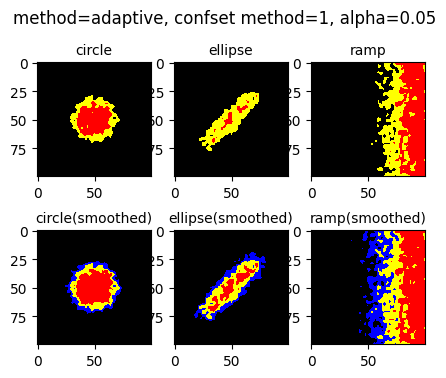

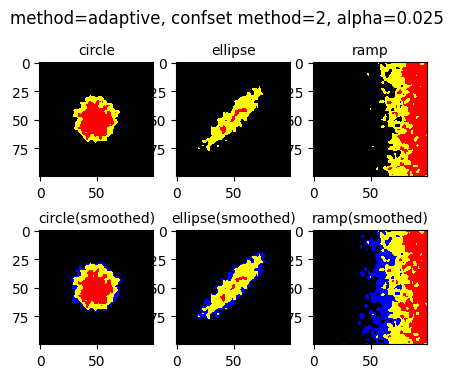

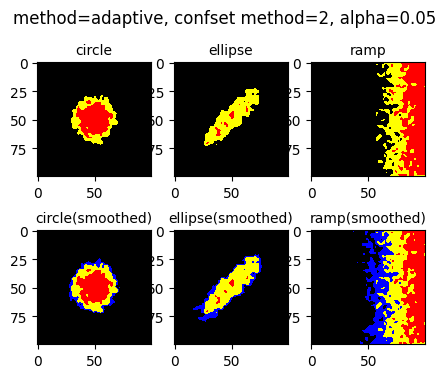

In [ ]:
conf_plot_agg_temp(threshold=2, temp = "0", std=7, method="adaptive", fontsize=10, figsize = (5,4))
conf_plot_agg_temp(threshold=2, temp = "1", std=7, method="adaptive",  fontsize=10, alpha=0.05, figsize = (5,4))
conf_plot_agg_temp(threshold=2, temp = "2", std=7, method="adaptive",  fontsize=10, alpha=0.05/2, figsize = (5,4))
conf_plot_agg_temp(threshold=2, temp = "2", std=7, method="adaptive",  fontsize=10, alpha=0.05, figsize = (5,4))


# FDR Simulations

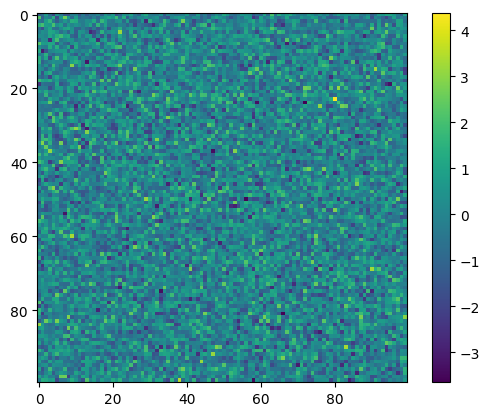

--------------------FDR----------------
50*50 no signal FDR (method 0 - one sided): 0.0
50*50 no signal FDR (method 0 - two sided): 0.013
50*50 no signal FDR (method 1 - one sided): 0.0
50*50 no signal FDR (method 1 - two sided): 0.024
50*50 no signal FDR (method 2 - one sided): 0.0
50*50 no signal FDR (method 2 - two sided): 0.018
--------------------FNDR----------------
FNDR for method 2 = average of ERR1 and ERR2
50*50 no signal FNDR (method 0 - one sided): 0.05
50*50 no signal FNDR (method 0 - two sided): 0.057990400000000004
50*50 no signal FNDR (method 1 - one sided): 0.05
50*50 no signal FNDR (method 1 - two sided): 0.0499896
50*50 no signal FNDR (method 2 - one sided): 0.5
50*50 no signal FNDR (method 2 - two sided): 0.5


In [ ]:
#sanity check
dim_l = (80,100,100)
no_signal = np.random.randn(*dim_l)
plt.imshow(no_signal[0,:,:])
plt.colorbar()
plt.show()

num_sim=500


print("--------------------FDR----------------")
method0_one = []
for i in np.arange(num_sim):
  method0_one.append(error_check_temp(temp="0", mode="fdr", dim=(80,50,50), std=5, threshold=0, method="BH", shape = 'noise', alpha=0.05, tail="one"))
print("50*50 no signal FDR (method 0 - one sided):", np.mean(method0_one))

method0_two = []
for i in np.arange(num_sim):
  method0_two.append(error_check_temp(temp="0", mode="fdr", dim=(80,50,50), std=5, threshold=0, method="BH", shape = 'noise', alpha=0.05, tail="two"))
print("50*50 no signal FDR (method 0 - two sided):", np.mean(method0_two))


method1_one = []
for i in np.arange(num_sim):
  method1_one.append(error_check_temp(temp="1", mode="fdr", dim=(80,50,50), std=5, threshold=0, method="BH", shape = 'noise', alpha=0.05, tail="one"))
print("50*50 no signal FDR (method 1 - one sided):", np.mean(method1_one))


method1_two = []
for i in np.arange(num_sim):
  method1_two.append(error_check_temp(temp="1", mode="fdr", dim=(80,50,50), std=5, threshold=0, method="BH", shape = 'noise', alpha=0.05, tail="two"))
print("50*50 no signal FDR (method 1 - two sided):", np.mean(method1_two))



method2_one = []
for i in np.arange(num_sim):
  method2_one.append(error_check_temp(temp="2", mode="fdr", dim=(80,50,50), std=5, threshold=0, method="BH", shape = 'noise', alpha=0.05, tail="one"))
print("50*50 no signal FDR (method 2 - one sided):", np.mean(method2_one))

method2_two = []
for i in np.arange(num_sim):
  method2_two.append(error_check_temp(temp="2", mode="fdr", dim=(80,50,50), std=5, threshold=0, method="BH", shape = 'noise', alpha=0.05, tail="two"))
print("50*50 no signal FDR (method 2 - two sided):", np.mean(method2_two))



print("--------------------FNDR----------------")
print("FNDR for method 2 = average of ERR1 and ERR2")
FNDRmethod0_one = []
for i in np.arange(num_sim):
  FNDRmethod0_one.append(error_check_temp(temp="0", mode="fndr", dim=(80,50,50), std=5, threshold=0, method="BH", shape = 'noise', alpha=0.05, tail="one"))
print("50*50 no signal FNDR (method 0 - one sided):", np.mean(FNDRmethod0_one))

FNDRmethod0_two = []
for i in np.arange(num_sim):
  FNDRmethod0_two.append(error_check_temp(temp="0", mode="fndr", dim=(80,50,50), std=5, threshold=0, method="BH", shape = 'noise', alpha=0.05, tail="two"))
print("50*50 no signal FNDR (method 0 - two sided):", np.mean(FNDRmethod0_two))


FNDRmethod1_one = []
for i in np.arange(num_sim):
  FNDRmethod1_one.append(error_check_temp(temp="1", mode="fndr", dim=(80,50,50), std=5, threshold=0, method="BH", shape = 'noise', alpha=0.05, tail="one"))
print("50*50 no signal FNDR (method 1 - one sided):", np.mean(FNDRmethod1_one))


FNDRmethod1_two = []
for i in np.arange(num_sim):
  FNDRmethod1_two.append(error_check_temp(temp="1", mode="fndr", dim=(80,50,50), std=5, threshold=0, method="BH", shape = 'noise', alpha=0.05, tail="two"))
print("50*50 no signal FNDR (method 1 - two sided):", np.mean(FNDRmethod1_two))



FNDRmethod2_one = []
for i in np.arange(num_sim):
  FNDRmethod2_one.append(error_check_temp(temp="2", mode="fndr", dim=(80,50,50), std=5, threshold=0, method="BH", shape = 'noise', alpha=0.05, tail="one"))
print("50*50 no signal FNDR (method 2 - one sided):", np.mean(FNDRmethod2_one))

FNDRmethod2_two = []
for i in np.arange(num_sim):
  FNDRmethod2_two.append(error_check_temp(temp="2", mode="fndr", dim=(80,50,50), std=5, threshold=0, method="BH", shape = 'noise', alpha=0.05, tail="two"))
print("50*50 no signal FNDR (method 2 - two sided):", np.mean(FNDRmethod2_two))



## New attempt - option 1&2

### FDR

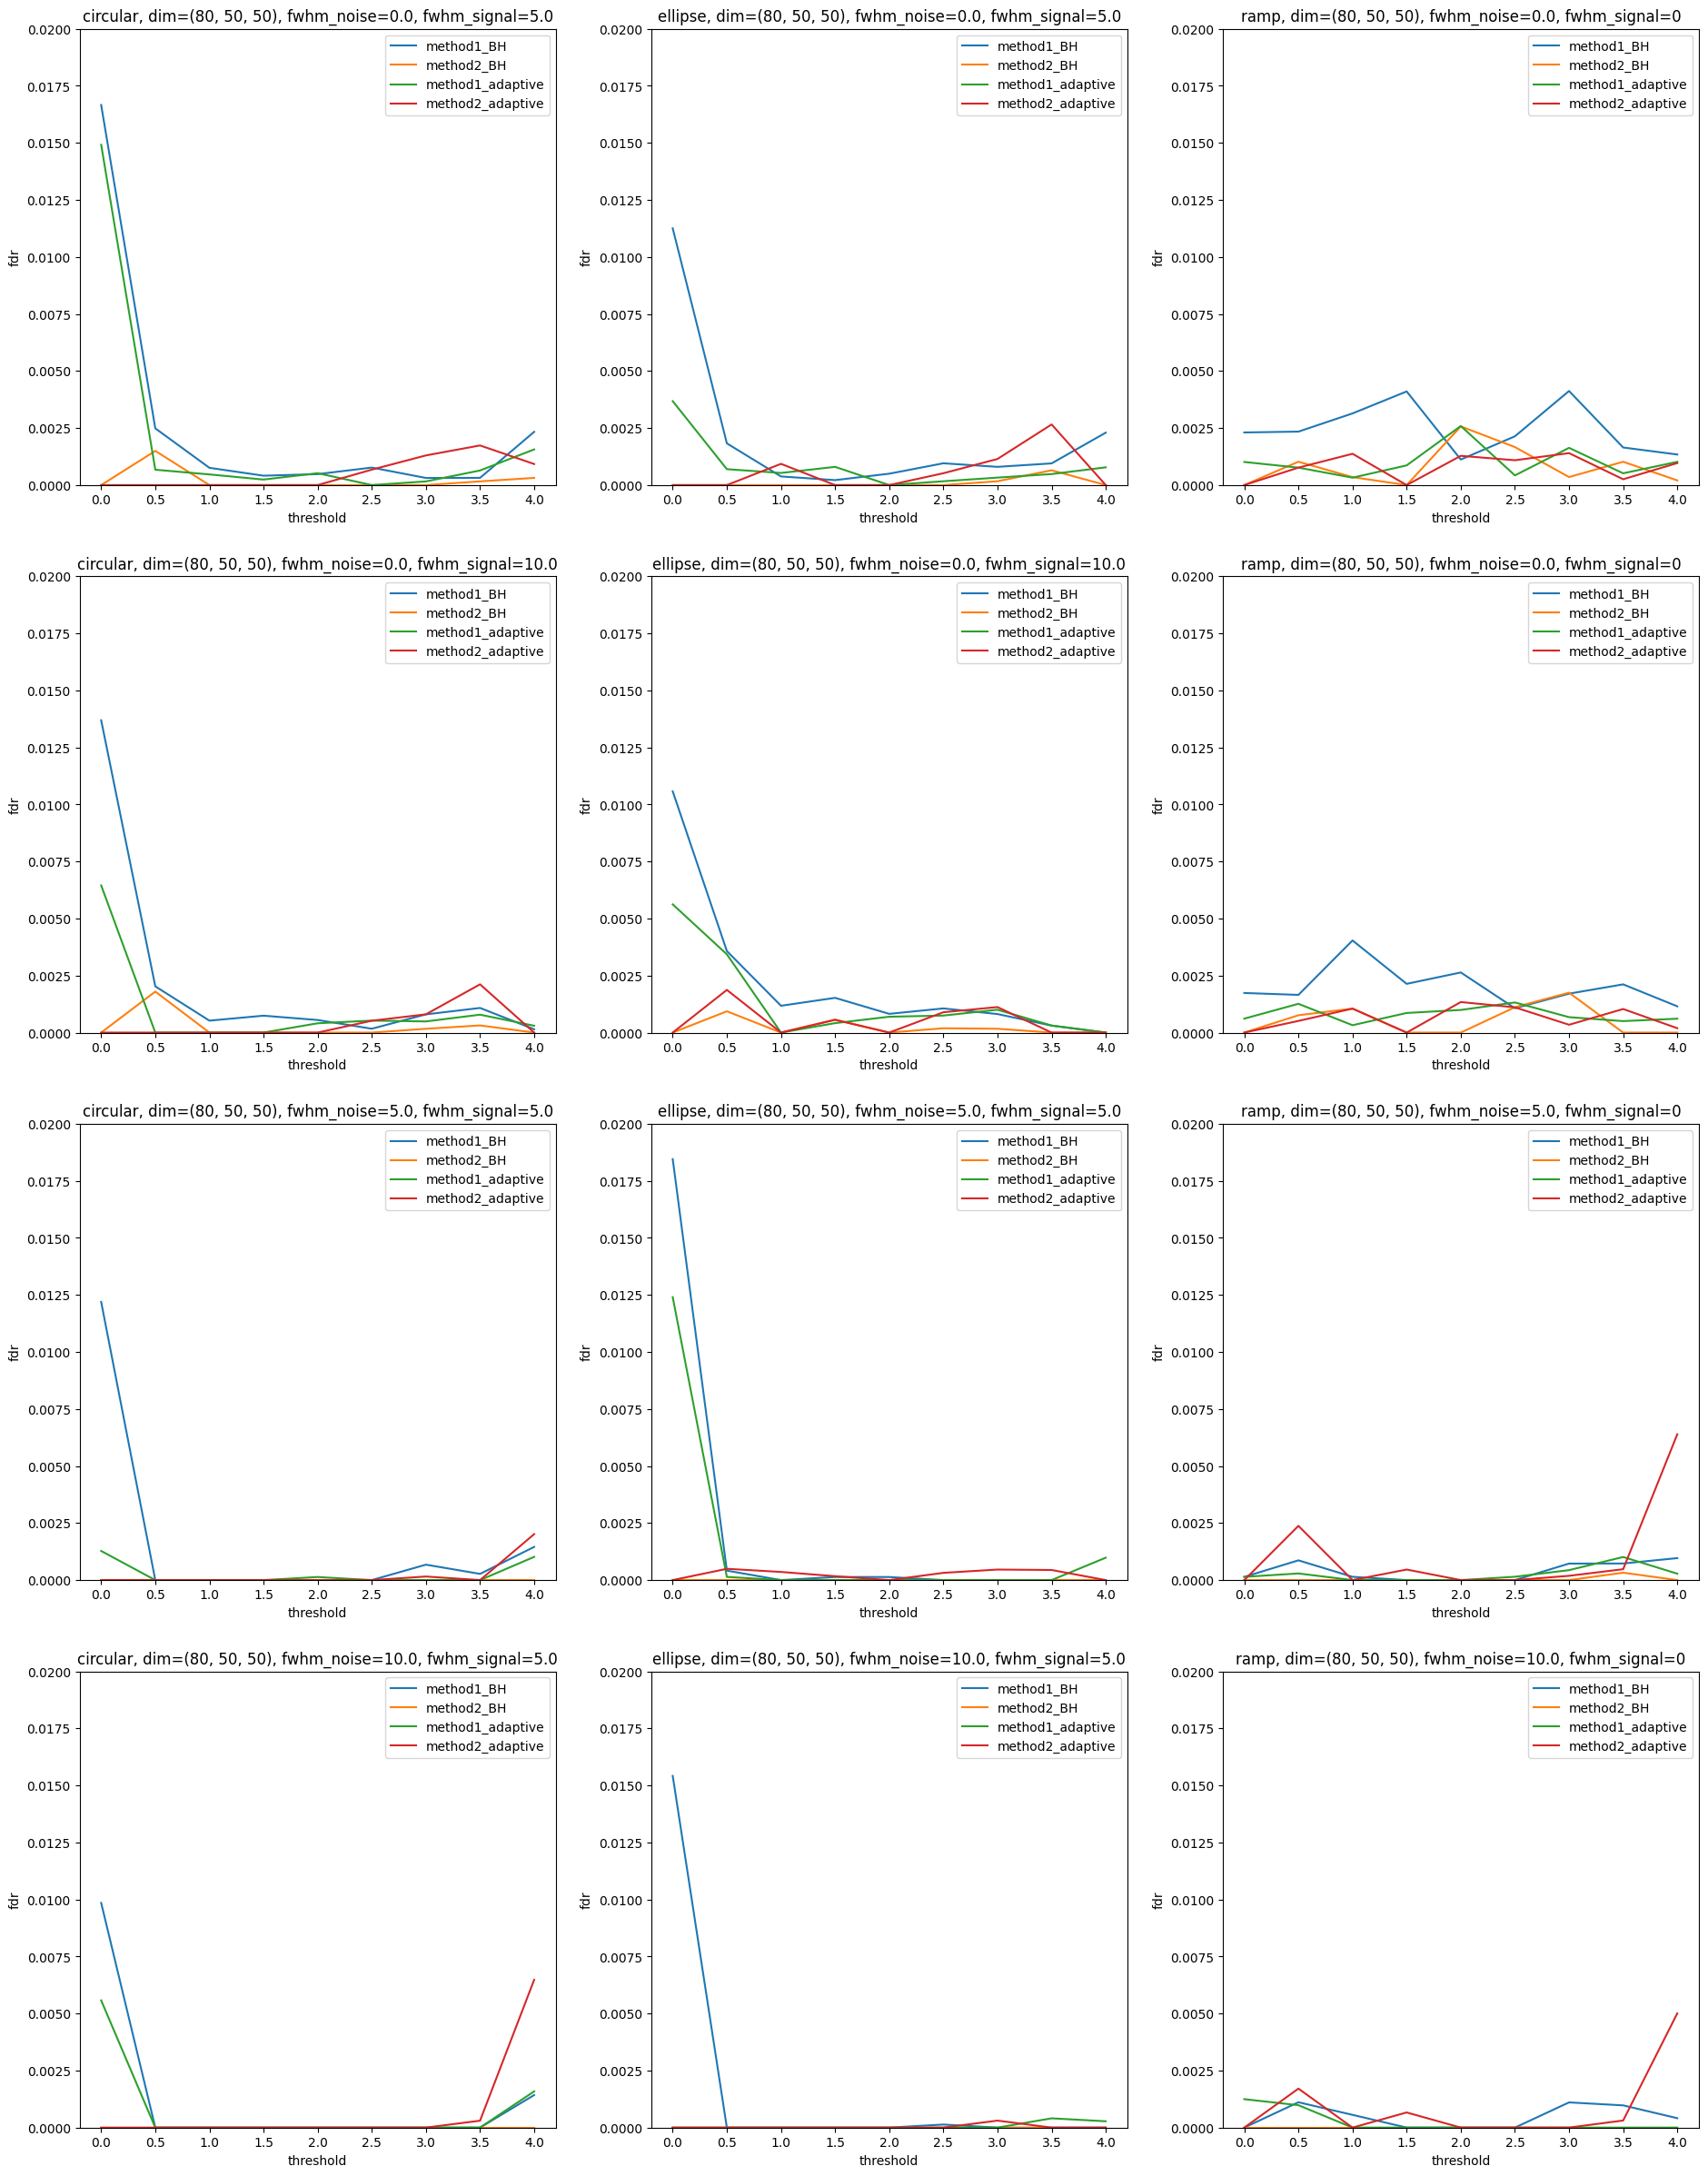

/usr/local/lib/python3.10/dist-packages/confidenceset/confset.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  y = (2 * kinv) / (1 - np.sqrt(1 - 4 * (1 - x) * kinv))


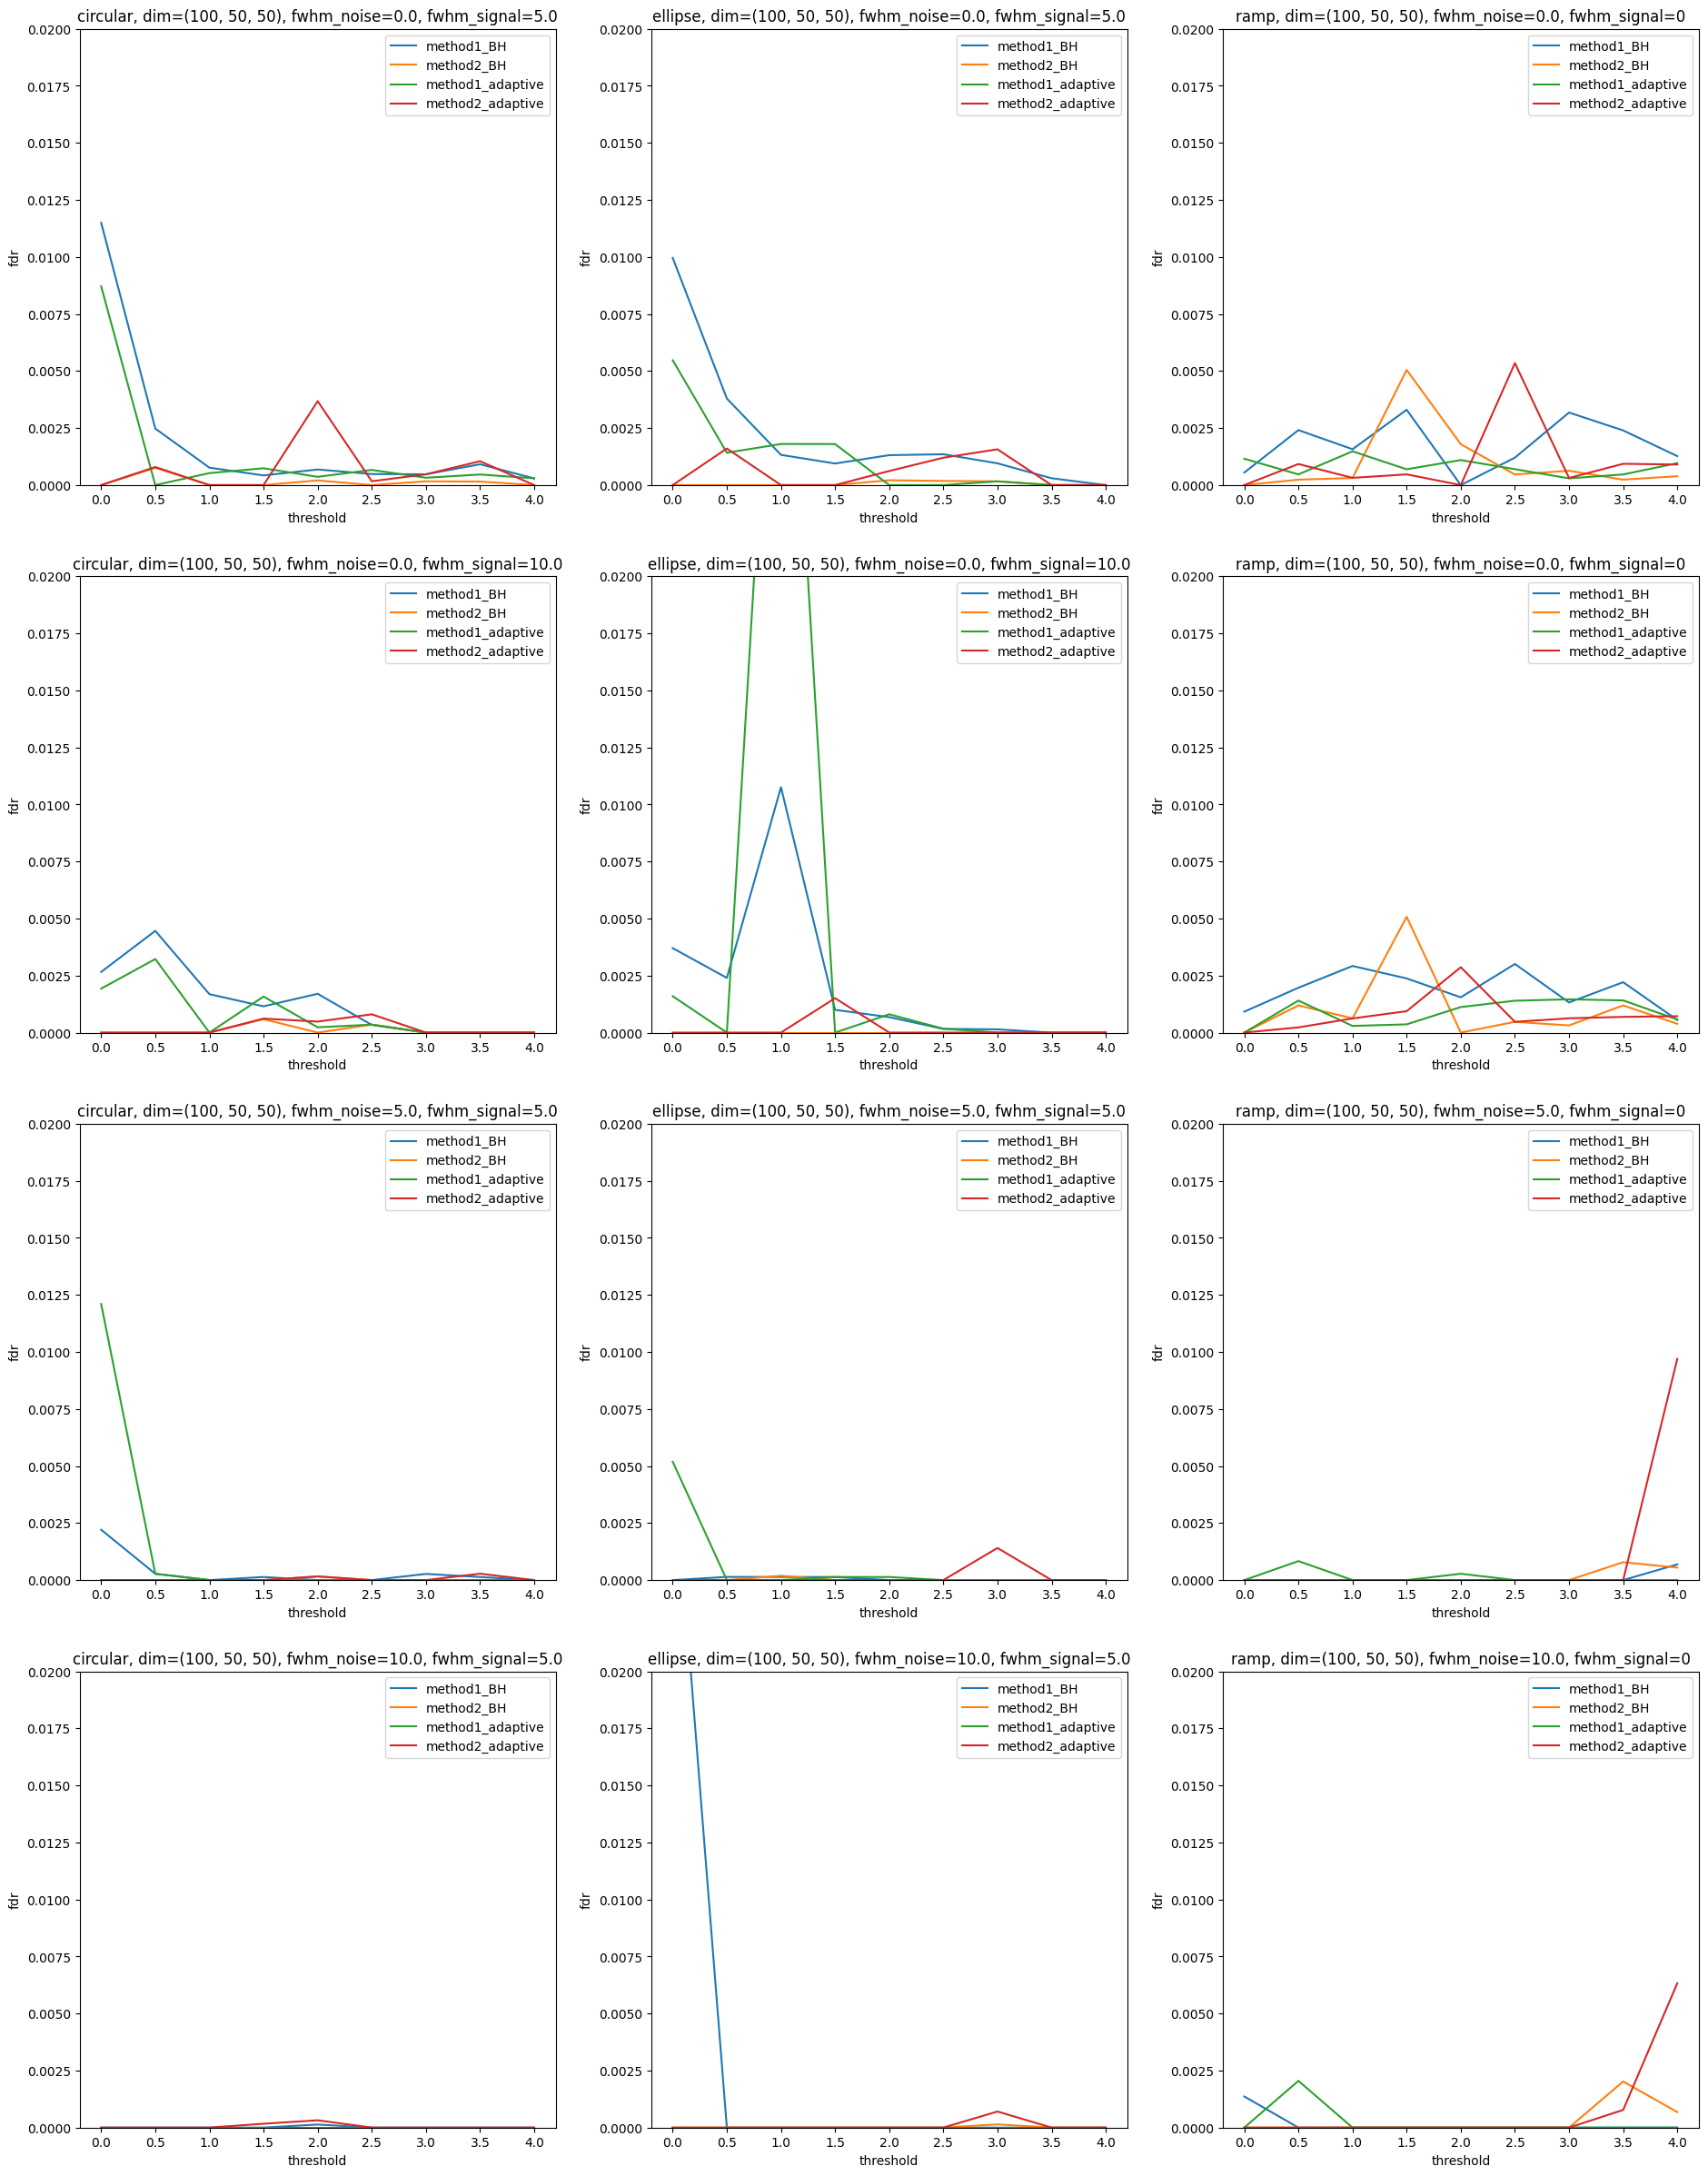

In [ ]:
error_check_plot(sim_num=3, mode="fdr", c=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4], shape_spec=shape_specs_sim, figsize=(23,30))

### FNDR

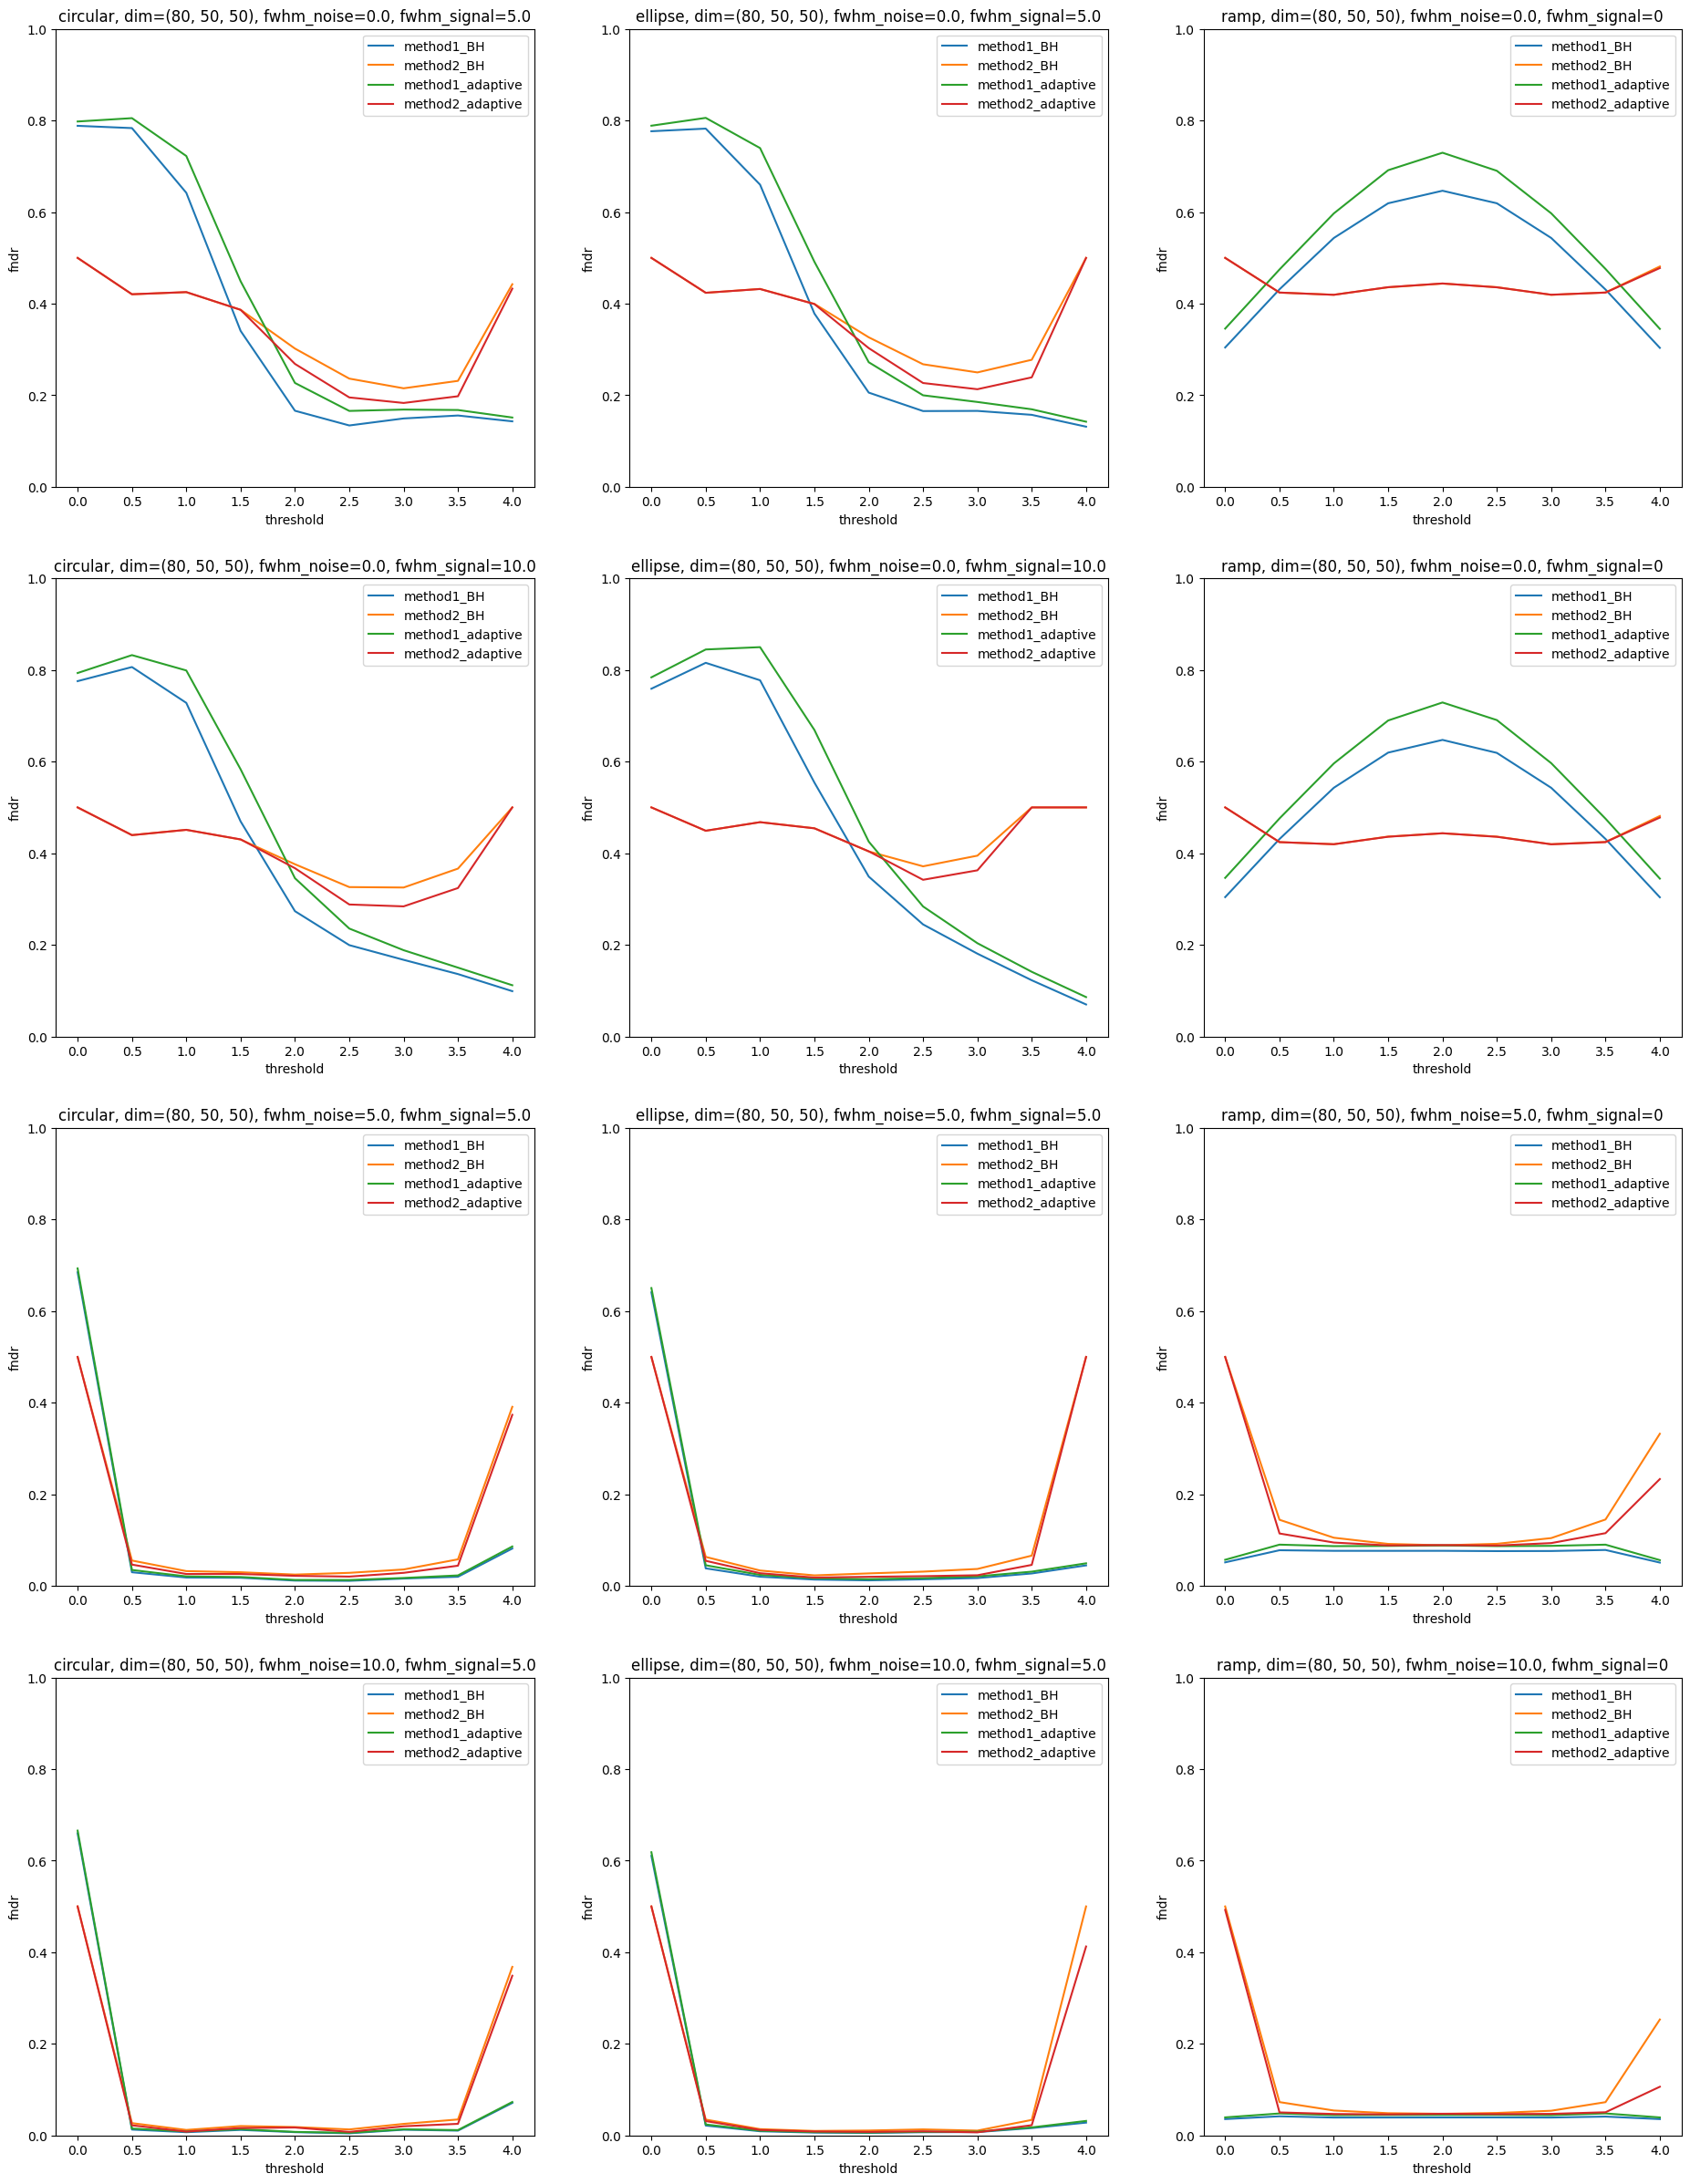

/usr/local/lib/python3.10/dist-packages/confidenceset/confset.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  y = (2 * kinv) / (1 - np.sqrt(1 - 4 * (1 - x) * kinv))


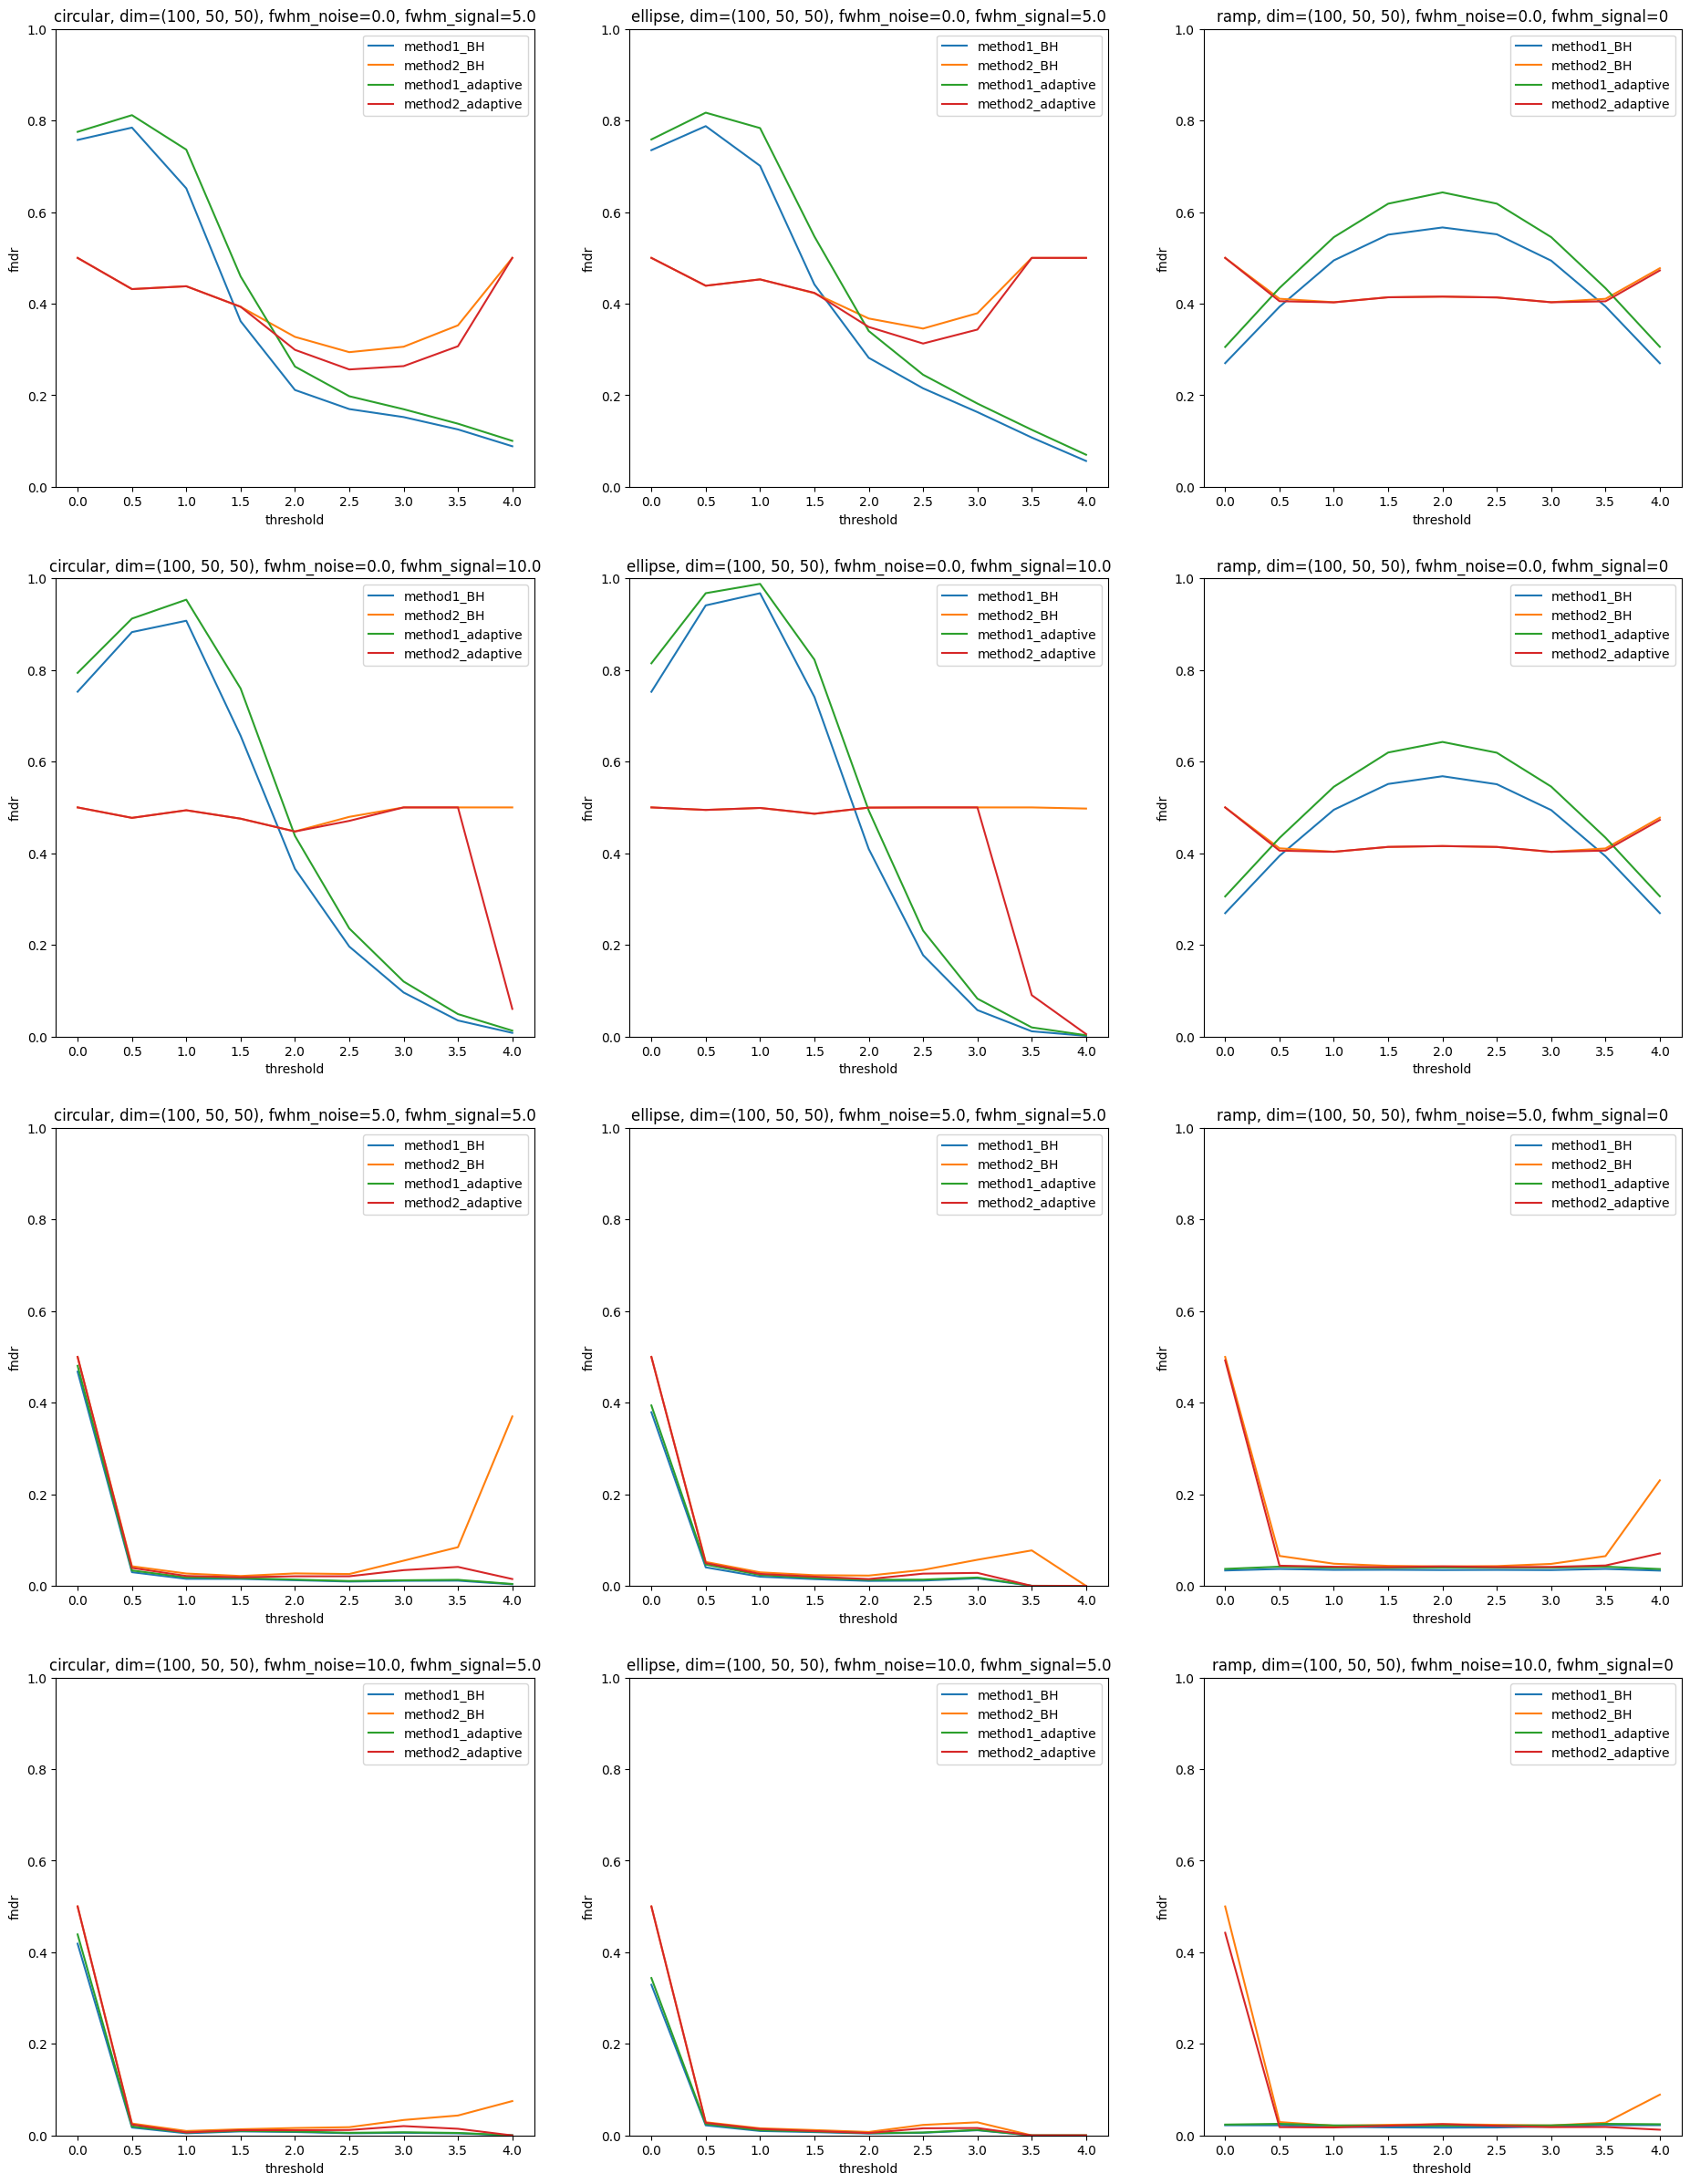

In [ ]:
#FNDR is average not added value
error_check_plot(sim_num=200, mode="fndr", shape_spec = shape_specs_sim, c=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4], figsize=(23,30))
